In [10]:
import numpy as np
from keras.datasets import fashion_mnist
import tensorflow as tf

In [3]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 15s 3us/step


In [4]:
print ("Number of samples/observations in training data: " + str(len(x_train)))
print ("Number of labels in training data: " + str(len(y_train)))
print ("Dimensions of a single image in x_train:" + str(x_train[0].shape))
print("-------------------------------------------------------------")
print ("Number of samples/observations in test data: " + str(len(x_test)))
print ("Number of labels in test data: " + str(len(y_test)))
print ("Dimensions of single image in x_test:" + str(x_test[0].shape))

Number of samples/observations in training data: 60000
Number of labels in training data: 60000
Dimensions of a single image in x_train:(28, 28)
-------------------------------------------------------------
Number of samples/observations in test data: 10000
Number of labels in test data: 10000
Dimensions of single image in x_test:(28, 28)


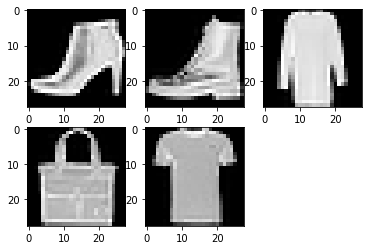

In [5]:
# Visualization library to visualize images 
import matplotlib.pyplot as plt

# Plotting 5 images, Subplot arugments represent nrows, ncols and index
# Color map is set to grey since our image dataset is grayscale
plt.subplot(231)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(232)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(233)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(234)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(235)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))


# Visualize the images
plt.show()

In [6]:
#Import necessary keras specific libraries

from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

# Setting Training Parameters like batch_size, epochs
batch_size = 128
epochs = 100

# Storing the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

''' Getting the data in the right 'shape' as required by Keras i.e. adding a 4th 
dimension to our data thereby changing the original image shape of (60000,28,28) 
to (60000,28,28,1)'''
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# Storing the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# Changing image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the data by changing the image pixel range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

# Performing one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Calculate the number of classes and number of pixels 
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

In [12]:
# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adadelta
              
              
              
              
              
              (),
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_12 (Bat  (None, 26, 26, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 batch_normalization_13 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                      

In [13]:
model_fitting = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
469/469 [==============================] - 145s 304ms/step - loss: 2.6085 - accuracy: 0.2505 - val_loss: 1.6692 - val_accuracy: 0.4894
Epoch 2/100
469/469 [==============================] - 138s 294ms/step - loss: 1.6123 - accuracy: 0.4887 - val_loss: 0.9138 - val_accuracy: 0.6931
Epoch 3/100
469/469 [==============================] - 134s 285ms/step - loss: 1.2878 - accuracy: 0.5898 - val_loss: 0.7832 - val_accuracy: 0.7324
Epoch 4/100
469/469 [==============================] - 131s 280ms/step - loss: 1.1102 - accuracy: 0.6407 - val_loss: 0.7073 - val_accuracy: 0.7556
Epoch 5/100
469/469 [==============================] - 131s 280ms/step - loss: 1.0126 - accuracy: 0.6715 - val_loss: 0.6586 - val_accuracy: 0.7695
Epoch 6/100
469/469 [==============================] - 131s 280ms/step - loss: 0.9372 - accuracy: 0.6933 - val_loss: 0.6226 - val_accuracy: 0.7842
Epoch 7/100
469/469 [==============================] - 133s 284ms/step - loss: 0.8749 - accuracy: 0.7125 - val_loss: 0

469/469 [==============================] - 141s 300ms/step - loss: 0.4572 - accuracy: 0.8450 - val_loss: 0.3670 - val_accuracy: 0.8725
Epoch 57/100
469/469 [==============================] - 142s 303ms/step - loss: 0.4566 - accuracy: 0.8444 - val_loss: 0.3660 - val_accuracy: 0.8730
Epoch 58/100
469/469 [==============================] - 137s 292ms/step - loss: 0.4537 - accuracy: 0.8459 - val_loss: 0.3642 - val_accuracy: 0.8736
Epoch 59/100
469/469 [==============================] - 135s 288ms/step - loss: 0.4478 - accuracy: 0.8465 - val_loss: 0.3631 - val_accuracy: 0.8743
Epoch 60/100
469/469 [==============================] - 141s 300ms/step - loss: 0.4507 - accuracy: 0.8461 - val_loss: 0.3622 - val_accuracy: 0.8748
Epoch 61/100
469/469 [==============================] - 138s 295ms/step - loss: 0.4441 - accuracy: 0.8490 - val_loss: 0.3608 - val_accuracy: 0.8753
Epoch 62/100
469/469 [==============================] - 132s 282ms/step - loss: 0.4477 - accuracy: 0.8489 - val_loss: 0.3599 